## Applied Artificial Intelligence

## Importing my Libraries

In [1]:
!pip install imblearn
!pip install gensim
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import os
import sys
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer



from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import gensim
import spacy
from wordcloud import WordCloud
from gensim.utils import simple_preprocess

In [3]:
df = pd.read_csv("all_kindle_review.csv")

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000


### Data Inspection

In [5]:
# Checking for null values

df.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
asin               0
helpful            0
rating             0
reviewText         0
reviewTime         0
reviewerID         0
reviewerName      38
summary            2
unixReviewTime     0
dtype: int64

In [6]:
# Checking unique categories 

df['rating'].value_counts()

rating
5    3000
4    3000
3    2000
2    2000
1    2000
Name: count, dtype: int64

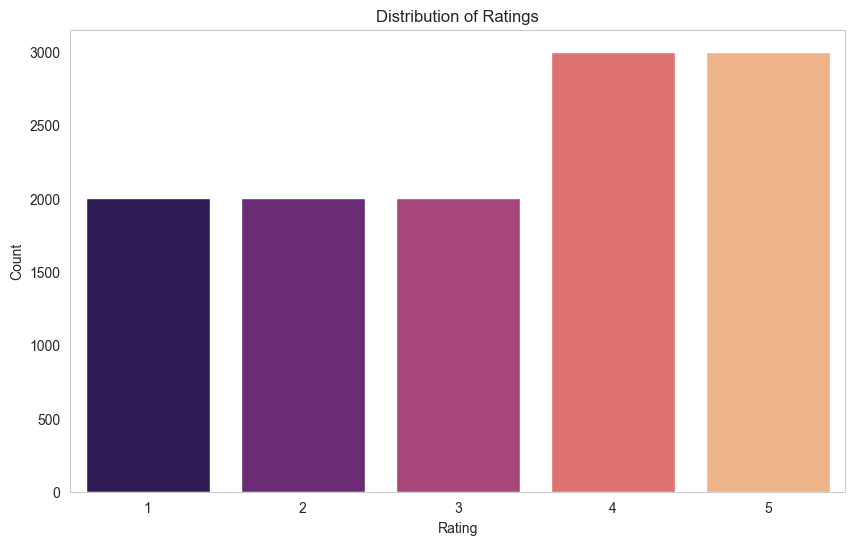

In [7]:
# Creating a count plot of the ratings distribution

sns.set_style("whitegrid")

# Adjusting figure size as needed

plt.figure(figsize=(10, 6))  

# Creating the count plot 

sns.countplot(x='rating', data=df, palette='magma')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(False)

plt.show()

### Data Cleaning and Preprocessing

In [8]:
# Converting to lowercase

df["reviewText"] = df["reviewText"].astype(str).apply(lambda x: x.lower())

In [9]:
# Removing punctuation

df["reviewText"] = df["reviewText"].astype(str).apply(lambda x : re.sub('[,\.?!]', '', x))

In [10]:
# Removing url and tags

df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))

In [11]:
# Removing emails 

df['reviewText'] = df['reviewText'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))  

In [12]:
# Removing extra spaces

df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x.split()))

In [13]:
# Breaking sentences to words

def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(sentence, deacc=False))

In [14]:
data = df['reviewText'].to_list()
data_words = list(sent_to_words(data))

In [15]:
# Generating the bigram

bigram = gensim.models.phrases.Phrases(data_words, min_count=5, threshold=100)

bigram[data_words]

In [16]:
trigram = gensim.models.phrases.Phrases(bigram[data_words], threshold=100)

In [17]:
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [18]:
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [19]:
for bigram in bigram_mod.phrasegrams.keys():
    print(bigram)

bounty_hunter
fair_share
character_development
older_brother
lady_knight
eagerly_awaiting
sci_fi
star_rating
lorelei_james
high_school
ten_years
community_center
strings_attached
native_american
absolutely_adore
th_grade
thoroughly_enjoyed
looking_forward
anya_bast
far_fetched
highly_recommend
jane_porter
interaction_between
law_firm
jaci_burton
eacute_nage
highly_recommended
private_property
joyfully_reviewed
someone_else
roller_coaster
coaster_ride
bulldog_drummond
found_myself
light_hearted
henry_wright
perfect_match
stand_alone
bound_hearts
look_forward
family_members
halfway_through
full_length
fast_paced
josh_lanyon
poorly_written
best_friend
lusted_after
anywhere_near
rough_rider
friday_night
hailey_jennison
marie_harte
samhain_publishing
alpha_male
chemistry_between
serial_killers
coachella_valley
halle_puma
dana_marie
marie_bell
jr_ward
word_usage
year_old
teenage_girl
both_sides
action_packed
ja_konrath
post_apocalyptic
jane_austen
modern_day
whispering_lake
comes_across
new_

In [20]:
for trigram in trigram_mod.phrasegrams.keys():
    print(trigram)

bounty_hunter
fair_share
character_development
older_brother
lady_knight
eagerly_awaiting
sci_fi
star_rating
lorelei_james
high_school
ten_years
community_center
strings_attached
native_american
absolutely_adore
th_grade
thoroughly_enjoyed
looking_forward
anya_bast
highly_recommend
jane_porter
difference_between
interaction_between
main_character
law_firm
highly_recommended
private_property
joyfully_reviewed
someone_else
james_bond
bulldog_drummond
found_myself
light_hearted
henry_wright
perfect_match
stand_alone
bound_hearts
look_forward
family_members
halfway_through
full_length
self_contained
fast_paced
josh_lanyon
poorly_written
best_friend
anywhere_near
rough_rider
friday_night
marie_harte
samhain_publishing
alpha_male
chemistry_between
serial_killers
halle_puma
dana_marie
dana_marie_bell
jr_ward
word_usage
year_old
teenage_girl
both_sides
action_packed
ja_konrath
post_apocalyptic
jane_austen
modern_day
whispering_lake
comes_across
writing_style
science_fiction
sherlock_holmes
fiv

In [21]:
# Converting words to base forms and removing stopwords

from gensim.parsing.preprocessing import STOPWORDS

my_stop_words = STOPWORDS.union(set(['br']))

In [22]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in my_stop_words] for doc in texts]

In [23]:
data_words_no_stops = remove_stopwords(data_words)

In [24]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [25]:
data_words_bigrams = make_bigrams(data_words_no_stops)
data_words_trigrams = make_trigrams(data_words_no_stops)

In [26]:
# Printing out bigrams and trigrams

for i, text in enumerate(data_words_trigrams):
    for word in text:
        if "_" in word:
            print(i, word)

0 bounty_hunter
0 fair_share
2 character_development
5 older_brother
5 lady_knight
5 eagerly_awaiting
10 sci_fi
12 star_rating
13 lorelei_james
13 high_school
13 community_center
13 strings_attached
13 native_american
13 absolutely_adore
15 th_grade
19 thoroughly_enjoyed
19 looking_forward
20 anya_bast
20 far_fetched
20 highly_recommend
21 jane_porter
21 highly_recommend
27 main_character
29 law_firm
29 jaci_burton
29 eacute_nage
29 highly_recommended
29 eacute_nage
30 strings_attached
30 eacute_nage
30 eacute_nage
30 eacute_nage
30 private_property
30 joyfully_reviewed
37 roller_coaster
37 main_character
37 highly_recommend
40 james_bond
40 bulldog_drummond
43 light_hearted
43 henry_wright
44 thoroughly_enjoyed
44 perfect_match
45 highly_recommend
47 bound_hearts
48 look_forward
49 family_members
50 self_contained
51 fast_paced
52 josh_lanyon
53 poorly_written
54 best_friend
60 main_character
64 rough_rider
67 friday_night
67 hailey_jennison
67 marie_harte
67 samhain_publishing
67 mar

In [27]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in
                            allowed_postags])
    return texts_out

In [28]:
# Initializing spacy 'en' model, keeping only tagger component (for efficiency)

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv

data_lemmatized = lemmatization(data_words_trigrams)

print('data_lemmatized[:1]', data_lemmatized[:1])

data_lemmatized[:1] [['short', 'mess', 'man', 'haul', 'know', 'famous', 'bounty_hunter', 'man', 'finish', 'year', 'long', 'quest', 'avenge', 'sister', 'murder', 'try', 'figure', 'snotty', 'nosed', 'farm', 'boy', 'rescue', 'gang', 'bully', 'offer', 'money', 'kill', 'man', 'force', 'ranch', 'reluctantly', 'agree', 'bring', 'man', 'justice', 'kill', 'outright', 'need', 'tell', 'sister', 'springer', 'bailey', 'ride', 'trail', 'sleep', 'ground', 'past', 'month', 'try', 'jace', 'want', 'revenge', 'man', 'kill', 'husband', 'take', 'ranch', 'crime', 'keen', 'detour', 'want', 'realize', 'option', 'hide', 'boy', 'persona', 'good', 'try', 'pace', 'confrontation', 'way', 'get', 'shoot', 'jace', 'discover', 'kyle', 'kyla', 'come', 'clean', 'reason', 'need', 'scoundrel', 'hope', 'help', 'book', 'share', 'touch', 'moment', 'slow', 'bloom', 'romance', 'kyla', 'good', 'reason', 'fear', 'man', 'hide', 'boy', 'persona', 'watch', 'jace', 'slowly', 'pull', 'shell', 'help', 'conquer', 'fear', 'endear', 'pai

In [29]:
# Using ratings to assign positive and negative rating 1 and 2 as negative(0), 3, 4 and 5 as positive(1)

df['rating'] = df['rating'].replace([1, 2], 0)
df['rating'] = df['rating'].replace([3, 4, 5], 1)

### Generating a WordCloud

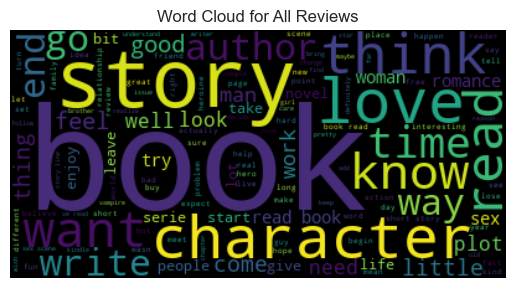

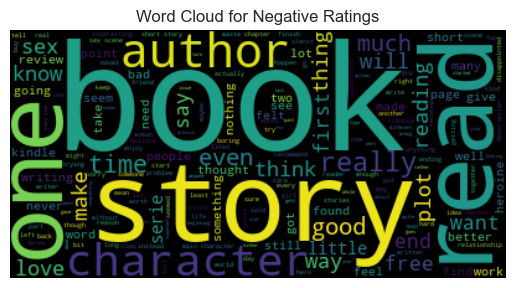

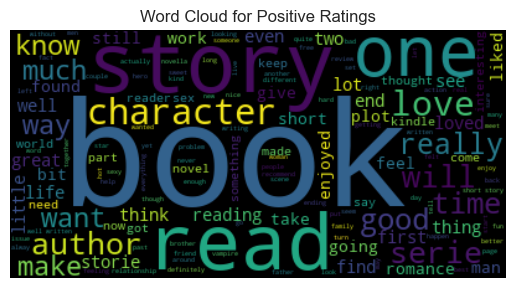

In [30]:
def getWordCloud(all_text, negative_text, positive_text):
    
# Function to generate and display word cloud

    def generate_wordcloud(text, title):
        if text:
            wordcloud = WordCloud().generate(text)
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title(title)
            plt.axis("off")
            plt.show()
        else:
            print(f"No reviews with {title.split()[2]} ratings found.")
    
# Generate word cloud for all reviews

    generate_wordcloud(all_text, 'Word Cloud for All Reviews')
    
# Generate word cloud for negative ratings

    generate_wordcloud(negative_text, 'Word Cloud for Negative Ratings')
    
# Generate word cloud for positive ratings

    generate_wordcloud(positive_text, 'Word Cloud for Positive Ratings')

    
strings = [' '.join(l) for l in data_lemmatized]

# Extracting text for different ratings

all_text = ' '.join(strings)
negative_text = ' '.join(df['reviewText'][df['rating'] == 0])
positive_text = ' '.join(df['reviewText'][df['rating'] == 1])

# Generating word clouds

getWordCloud(all_text, negative_text, positive_text)

### Visualization

In [31]:
df.rating.value_counts()

rating
1    8000
0    4000
Name: count, dtype: int64

In [32]:
# Function to plot histogram and pie chart

def plot_rating_distribution(data, labels,  colors, chart_type='pie'):
    if chart_type == 'pie':
        plt.title('Distribution of Rating')
        plt.pie(data, labels=labels, colors=['purple', 'salmon'])
        plt.legend()
    elif chart_type == 'histogram':
        bins = range(len(data))
        plt.bar(bins, data, color=['purple', 'salmon'])
        plt.xlabel('Rating')
        plt.ylabel('Count')
        plt.title('Distribution of Rating')
        plt.xticks(bins, labels)
        plt.grid(False)
    else:
        print("Invalid chart type. Choose between 'pie' and 'histogram'.")
        return

    plt.show()

# Data for both charts
data = [4000, 8000]
labels = ["0", "1"]

# Where 0 represents (negative rating) and 1 represents (positive rating)

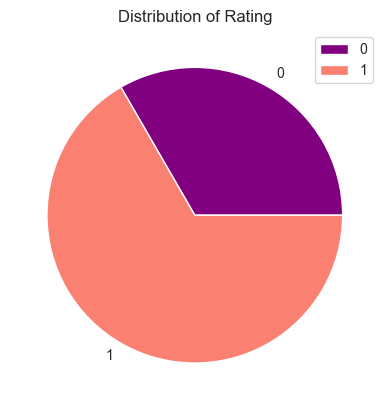

In [33]:
# Plotting pie chart

plot_rating_distribution(data, labels, chart_type='pie', colors=['purple', 'salmon'])

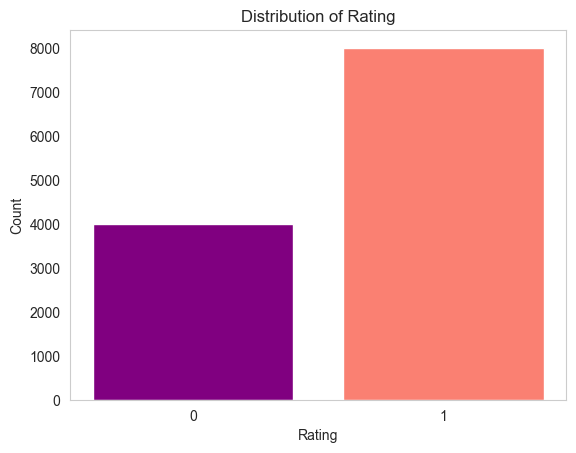

In [34]:
# Plotting histogram

plot_rating_distribution(data, labels, colors=['purple', 'salmon'], chart_type='histogram')

### Data splitting and balancing

In [35]:
# Splitting the data

X = df['reviewText']
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Converting text to numbers

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train).toarray()
X_test_bow = vectorizer.transform(X_test).toarray()

# Initializing SMOTE for data balancing

smote = SMOTE(random_state=42)

# Resampling the training data only

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_bow, y_train)

In [36]:
# Printing the distribution of the rating after SMOTE

print("Distribution of Rating after SMOTE:")
print(y_train_resampled.value_counts())

Distribution of Rating after SMOTE:
rating
1    5644
0    5644
Name: count, dtype: int64


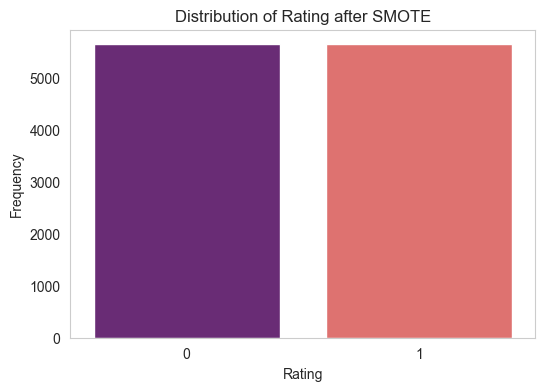

In [37]:
# Creating a count plot of the new ratings distribution

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled, data=y_train_resampled, palette='magma')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating after SMOTE')
plt.grid(False)
plt.show()

## Building the Traditional Machine Learning Models

In [38]:
# Importing necessary libraries for my traditional learning models

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Function to train the model and make predictions.

def train_and_predict(model, X_train, y_train, X_test):
    clf = model.fit(X_train, y_train)
    return clf.predict(X_test)

# Function to plot confusion matrix as heat map

def plot_confusion_matrix(cm, cmap='Blues'):
    plt.figure(figsize=(6, 4)) 
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', annot_kws={"size": 10})
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Function to evaluate model performance.

def evaluate_model(prediction, actual, cmap='Blues'):
    cm = confusion_matrix(actual, prediction)
    plot_confusion_matrix(cm, cmap)
    print('\nAccuracy:', accuracy_score(actual, prediction))
    print('\nClassification Report:\n', classification_report(actual, prediction))

### Building the Multinomial Naive Bayes

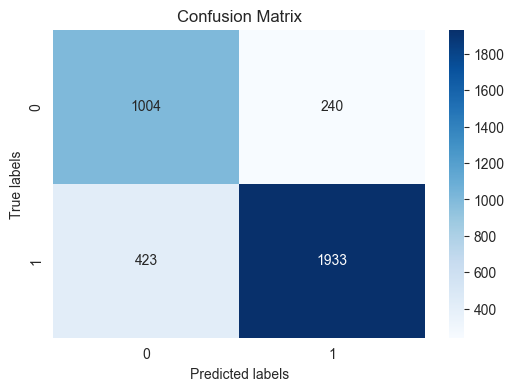


Accuracy: 0.8158333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      1244
           1       0.89      0.82      0.85      2356

    accuracy                           0.82      3600
   macro avg       0.80      0.81      0.80      3600
weighted avg       0.83      0.82      0.82      3600



In [41]:
# Multinomial Naive Bayes model

clf_bow = MultinomialNB()
prediction_bow = train_and_predict(clf_bow, X_train_resampled, y_train_resampled, X_test_bow)
evaluate_model(prediction_bow, y_test)

#### Hyperparameter tuning

Best Parameters: {'alpha': 1.0}


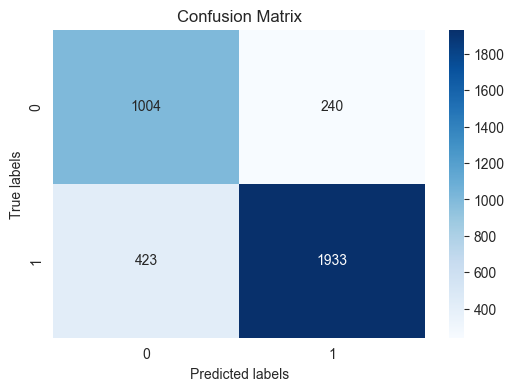


Accuracy: 0.8158333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      1244
           1       0.89      0.82      0.85      2356

    accuracy                           0.82      3600
   macro avg       0.80      0.81      0.80      3600
weighted avg       0.83      0.82      0.82      3600



In [42]:
# Importing library

from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]
}

# Initializing Multinomial Naive Bayes classifier

clf_bow = MultinomialNB()

# Initializing GridSearchCV

grid_search = GridSearchCV(estimator=clf_bow, param_grid=param_grid, cv=5, scoring='accuracy')

# Performing grid search

grid_search.fit(X_train_resampled, y_train_resampled)

# Printing the best parameters found

print("Best Parameters:", grid_search.best_params_)

# Using the best model for prediction

best_clf = grid_search.best_estimator_
prediction_bow_tuned = train_and_predict(best_clf, X_train_resampled, y_train_resampled, X_test_bow)

# Evaluating the tuned model

evaluate_model(prediction_bow_tuned, y_test)

### Fine Tuning

Best Parameters: {'alpha': 1.0, 'fit_prior': False}


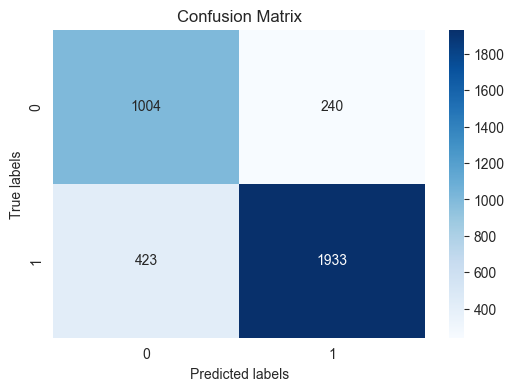


Accuracy: 0.8158333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      1244
           1       0.89      0.82      0.85      2356

    accuracy                           0.82      3600
   macro avg       0.80      0.81      0.80      3600
weighted avg       0.83      0.82      0.82      3600



In [44]:
# Using alpha and fit_prior

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'fit_prior': [True, False]
}

# Initializing Multinomial Naive Bayes classifier

clf_bow = MultinomialNB()

# Initializing GridSearchCV

grid_search = GridSearchCV(estimator=clf_bow, param_grid=param_grid, cv=5, scoring='accuracy')

# Performing grid search

grid_search.fit(X_train_resampled, y_train_resampled)

# Printing the best parameters found

print("Best Parameters:", grid_search.best_params_)

# Using the best model for prediction

best_clf = grid_search.best_estimator_
prediction_bow_tuned = train_and_predict(best_clf, X_train_resampled, y_train_resampled, X_test_bow)

# Evaluating the tuned model

evaluate_model(prediction_bow_tuned, y_test)

### Building the Random Forest Model

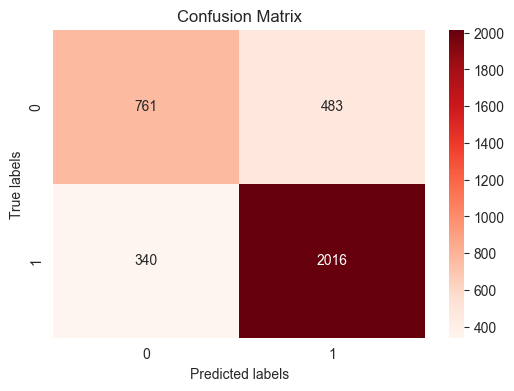


Accuracy: 0.7713888888888889

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.61      0.65      1244
           1       0.81      0.86      0.83      2356

    accuracy                           0.77      3600
   macro avg       0.75      0.73      0.74      3600
weighted avg       0.77      0.77      0.77      3600



In [46]:
# Random forest model

clf_rf = RandomForestClassifier()
prediction_rf = train_and_predict(clf_rf, X_train_resampled, y_train_resampled, X_test_bow)
evaluate_model(prediction_rf, y_test, cmap='Reds')

#### Hyperparameter tuning

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


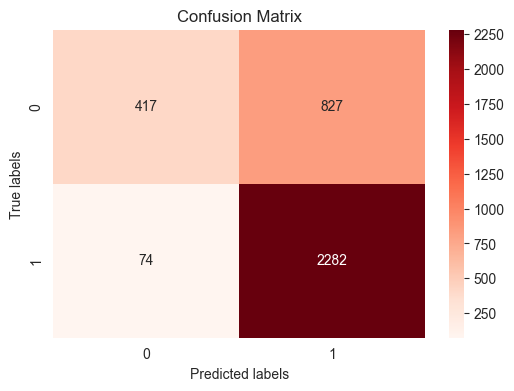


Accuracy: 0.7497222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.34      0.48      1244
           1       0.73      0.97      0.84      2356

    accuracy                           0.75      3600
   macro avg       0.79      0.65      0.66      3600
weighted avg       0.77      0.75      0.71      3600



In [47]:
# Reducing the size of my data

X_train_resampled_subset = X_train_resampled[:5000]
y_train_resampled_subset = y_train_resampled[:5000]

# Defining the hyperparameters grid

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiating the Random Forest Classifier

clf_rf = RandomForestClassifier()

# Instantiating GridSearchCV with reduced memory usage

grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, pre_dispatch='2*n_jobs')

# Performing Grid Search

grid_search.fit(X_train_resampled_subset, y_train_resampled_subset)

# Best parameters

print("Best Parameters:", grid_search.best_params_)

# Predicting using the best model

best_clf_rf = grid_search.best_estimator_
prediction_rf_tuned = train_and_predict(best_clf_rf, X_train_resampled_subset, y_train_resampled_subset, X_test_bow)

# Evaluating the model

evaluate_model(prediction_rf_tuned, y_test, cmap='Reds')

#### Regularization

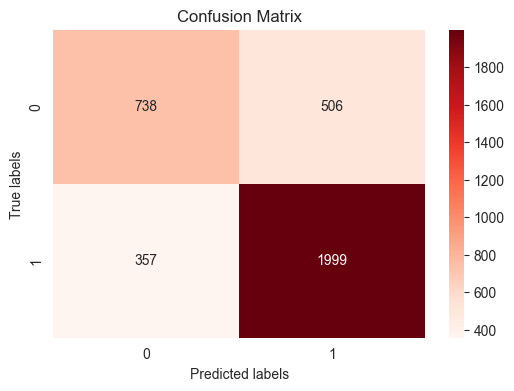


Accuracy: 0.7602777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.59      0.63      1244
           1       0.80      0.85      0.82      2356

    accuracy                           0.76      3600
   macro avg       0.74      0.72      0.73      3600
weighted avg       0.76      0.76      0.76      3600



In [48]:
# Importing library

from sklearn.ensemble import BaggingClassifier

# Instantiating the base Random Forest Classifier

base_rf = RandomForestClassifier()

# Instantiating the Bagging Classifier with Random Forest as base estimator

bagging_rf = BaggingClassifier(base_rf, n_estimators=10, random_state=42)

# Training and predicting

prediction_bagging_rf = train_and_predict(bagging_rf, X_train_resampled, y_train_resampled, X_test_bow)

# Evaluating the model

evaluate_model(prediction_bagging_rf, y_test, cmap='Reds')

## Deep Learning Models 

In [49]:
# Importing necessary libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Embedding

In [50]:
comment = df.reviewText
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(comment)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(comment)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [51]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'a': 3, 'to': 4, 'i': 5, 'of': 6, 'it': 7, 'is': 8, 'this': 9, 'was': 10, 'in': 11, 'that': 12, 'for': 13, 'book': 14, 'but': 15, 'her': 16, 'with': 17, 'story': 18, 'not': 19, 'read': 20, 'have': 21, 'as': 22, 'she': 23, 'you': 24, 'he': 25, 'on': 26, 'be': 27, 'are': 28, 'one': 29, 'his': 30, 'so': 31, 'just': 32, 'like': 33, 'they': 34, 'all': 35, 'more': 36, 'me': 37, 'at': 38, 'my': 39, 'about': 40, 'good': 41, 'there': 42, 'from': 43, 'an': 44, 'if': 45, 'what': 46, 'would': 47, 'characters': 48, 'had': 49, 'out': 50, 'has': 51, 'really': 52, 'very': 53, 'or': 54, 'by': 55, 'when': 56, 'love': 57, 'up': 58, 'who': 59, 'were': 60, 'some': 61, 'will': 62, 'books': 63, 'their': 64, 'get': 65, 'no': 66, 'time': 67, 'author': 68, 'other': 69, 'reading': 70, 'them': 71, 'series': 72, 'well': 73, 'much': 74, 'first': 75, 'him': 76, 'into': 77, 'been': 78, "it's": 79, 'because': 80, 'even': 81, 'can': 82, 'how': 83, 'only': 84, 'too': 85, 'short': 86, 'did': 87, "did

In [52]:
sentiment_label = df.rating.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 1, 0], dtype=int64), Index([1, 0], dtype='int64'))

In [53]:
# function to plot metrics

def plot_history(history):
    # Plotting accuracy and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

## LSTM

In [54]:
# Define the embedding_vector_length

embedding_vector_length = 32

# Defining the model

model_lstm = Sequential()

# Adding layers

model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=200))
model_lstm.add(SpatialDropout1D(0.2)) 
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printing model summary

print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           1385280   
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1401931 (5.35 MB)
Trainable params: 1401931 (5.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [55]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(padded_sequence, sentiment_label[0], test_size=0.2, random_state=42)

In [56]:
# Training the model

history = model_lstm.fit(X_train, y_train, validation_split=0.25, epochs=10, batch_size=64)

Epoch 1/10
113/113 [==============================] - 7s 54ms/step - loss: 0.5836 - accuracy: 0.6935 - val_loss: 0.4834 - val_accuracy: 0.7492
Epoch 2/10
113/113 [==============================] - 6s 52ms/step - loss: 0.3662 - accuracy: 0.8386 - val_loss: 0.3989 - val_accuracy: 0.8213
Epoch 3/10
113/113 [==============================] - 6s 53ms/step - loss: 0.2619 - accuracy: 0.8938 - val_loss: 0.3964 - val_accuracy: 0.8363
Epoch 4/10
113/113 [==============================] - 6s 56ms/step - loss: 0.1890 - accuracy: 0.9275 - val_loss: 0.4191 - val_accuracy: 0.8329
Epoch 5/10
113/113 [==============================] - 6s 55ms/step - loss: 0.1419 - accuracy: 0.9504 - val_loss: 0.4492 - val_accuracy: 0.8229
Epoch 6/10
113/113 [==============================] - 6s 55ms/step - loss: 0.1114 - accuracy: 0.9643 - val_loss: 0.6399 - val_accuracy: 0.8075
Epoch 7/10
113/113 [==============================] - 6s 57ms/step - loss: 0.0946 - accuracy: 0.9681 - val_loss: 0.6411 - val_accuracy: 0.8142

75/75 [==============================] - 1s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1597
           1       0.75      0.72      0.73       803

    accuracy                           0.82      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.82      0.82      0.82      2400



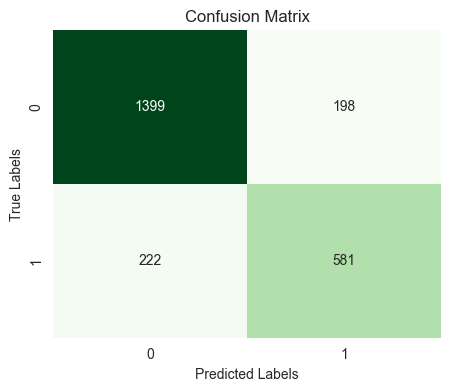

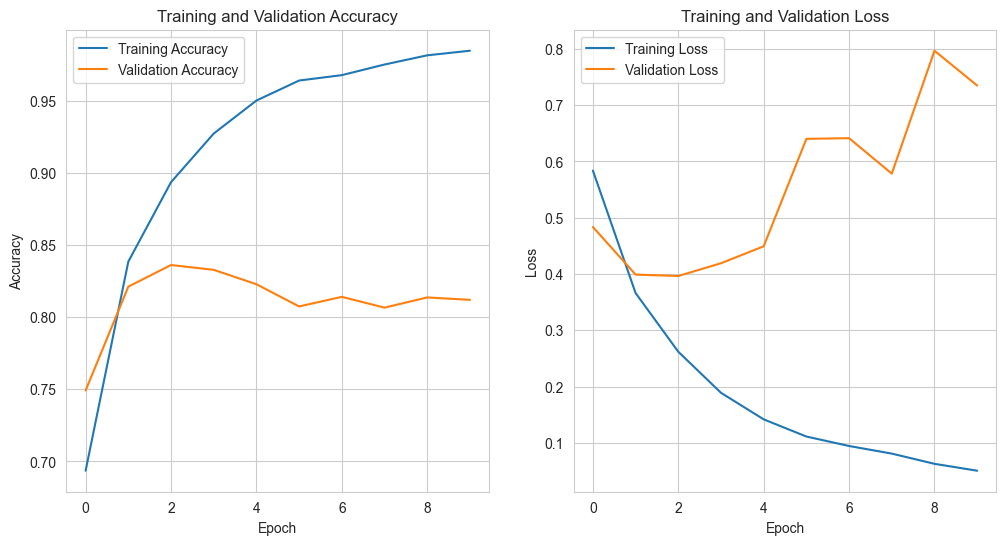

In [57]:
# Making predictions on the test data

predicted_probabilities = model_lstm.predict(X_test)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Classification Report

print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# Confusion Matrix

conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plotting metrics

plot_history(history)

### Hyperparameter tuning 

In [58]:
embedding_vector_length = 32
model_lstm_hp = Sequential() 
model_lstm_hp.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model_lstm_hp.add(SpatialDropout1D(0.25))
model_lstm_hp.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model_lstm_hp.add(Dropout(0.2))
model_lstm_hp.add(Dense(1, activation='sigmoid')) 
model_lstm_hp.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model_lstm_hp.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           1385280   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 200, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1401931 (5.35 MB)
Trainable params: 1401931 (5.35 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [59]:
# Training the model

history = model_lstm_hp.fit(X_train, y_train, validation_split=0.25, epochs=10, batch_size=64)

Epoch 1/10
113/113 [==============================] - 11s 86ms/step - loss: 0.5892 - accuracy: 0.6882 - val_loss: 0.4782 - val_accuracy: 0.7875
Epoch 2/10
113/113 [==============================] - 10s 87ms/step - loss: 0.3845 - accuracy: 0.8297 - val_loss: 0.3931 - val_accuracy: 0.8200
Epoch 3/10
113/113 [==============================] - 10s 87ms/step - loss: 0.3075 - accuracy: 0.8701 - val_loss: 0.4003 - val_accuracy: 0.8250
Epoch 4/10
113/113 [==============================] - 10s 88ms/step - loss: 0.2546 - accuracy: 0.8957 - val_loss: 0.4299 - val_accuracy: 0.8338
Epoch 5/10
113/113 [==============================] - 10s 89ms/step - loss: 0.2120 - accuracy: 0.9190 - val_loss: 0.4562 - val_accuracy: 0.8333
Epoch 6/10
113/113 [==============================] - 10s 89ms/step - loss: 0.1886 - accuracy: 0.9267 - val_loss: 0.4436 - val_accuracy: 0.8371
Epoch 7/10
113/113 [==============================] - 10s 89ms/step - loss: 0.1602 - accuracy: 0.9421 - val_loss: 0.4456 - val_accuracy:

75/75 [==============================] - 1s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1597
           1       0.72      0.78      0.75       803

    accuracy                           0.83      2400
   macro avg       0.81      0.82      0.81      2400
weighted avg       0.83      0.83      0.83      2400



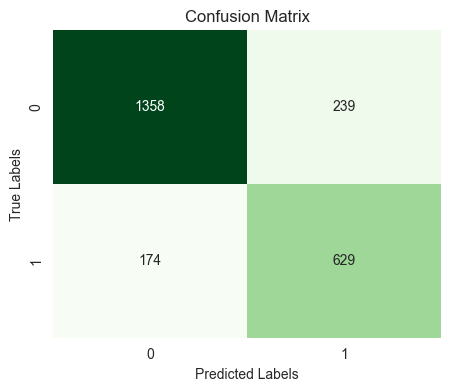

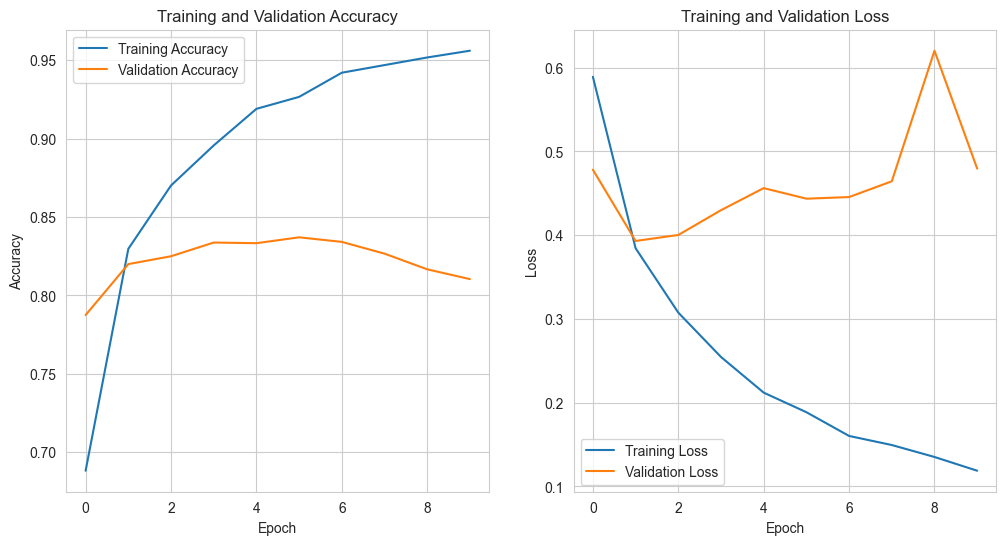

In [60]:
# Making predictions on the test data

predicted_probabilities = model_lstm_hp.predict(X_test)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Classification Report

print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# Confusion Matrix

conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plotting metrics

plot_history(history)

### Regularization 

In [61]:
from tensorflow.keras.regularizers import l2

# Define the embedding_vector_length

embedding_vector_length = 32

model_lstm_reg = Sequential()

# Adding layers with regularization

model_lstm_reg.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=200))
model_lstm_reg.add(SpatialDropout1D(0.2)) 
model_lstm_reg.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))  # Adding dropout regularization to LSTM
model_lstm_reg.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))  # Adding L2 regularization to the Dense layer

model_lstm_reg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printing model summary

print(model_lstm_reg.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           1385280   
                                                                 
 spatial_dropout1d_2 (Spati  (None, 200, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_2 (LSTM)               (None, 50)                16600     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1401931 (5.35 MB)
Trainable params: 1401931 (5.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [62]:
# Training the model

history = model_lstm_reg.fit(X_train, y_train, validation_split=0.25, epochs=10, batch_size=64)

Epoch 1/10
113/113 [==============================] - 11s 87ms/step - loss: 0.6009 - accuracy: 0.6931 - val_loss: 0.4659 - val_accuracy: 0.7875
Epoch 2/10
113/113 [==============================] - 10s 87ms/step - loss: 0.3802 - accuracy: 0.8435 - val_loss: 0.4128 - val_accuracy: 0.8258
Epoch 3/10
113/113 [==============================] - 10s 88ms/step - loss: 0.2907 - accuracy: 0.8938 - val_loss: 0.3956 - val_accuracy: 0.8354
Epoch 4/10
113/113 [==============================] - 10s 89ms/step - loss: 0.2343 - accuracy: 0.9211 - val_loss: 0.4083 - val_accuracy: 0.8358
Epoch 5/10
113/113 [==============================] - 10s 89ms/step - loss: 0.1944 - accuracy: 0.9374 - val_loss: 0.4334 - val_accuracy: 0.8271
Epoch 6/10
113/113 [==============================] - 10s 86ms/step - loss: 0.1667 - accuracy: 0.9521 - val_loss: 0.4920 - val_accuracy: 0.8279
Epoch 7/10
113/113 [==============================] - 10s 89ms/step - loss: 0.1572 - accuracy: 0.9560 - val_loss: 0.5316 - val_accuracy:

75/75 [==============================] - 1s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1597
           1       0.73      0.77      0.75       803

    accuracy                           0.83      2400
   macro avg       0.81      0.82      0.81      2400
weighted avg       0.83      0.83      0.83      2400



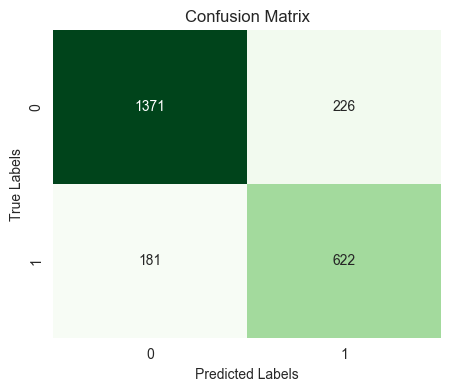

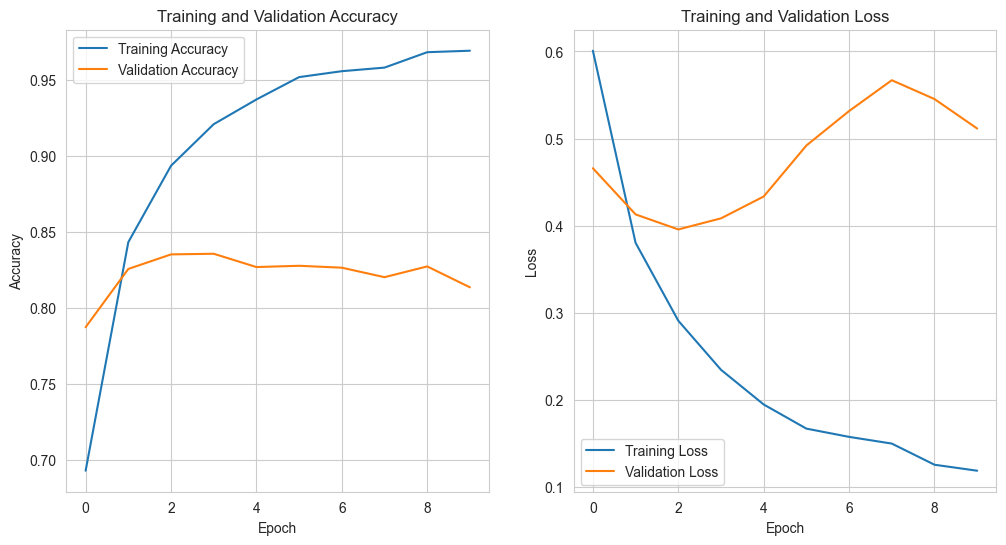

In [63]:
# Making predictions on the test data

predicted_probabilities = model_lstm_reg.predict(X_test)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Classification Report

print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# Confusion Matrix

conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plotting metrics

plot_history(history)

### RNN

In [64]:
# Defining the RNN model

model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=200),
    tf.keras.layers.SimpleRNN(100),  
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

# Compiling the model

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing the model summary

print(model_rnn.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          5541120   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               22900     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5564121 (21.23 MB)
Trainable params: 5564121 (21.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [65]:
history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
240/240 [==============================] - 10s 38ms/step - loss: 0.5770 - accuracy: 0.7008 - val_loss: 0.5763 - val_accuracy: 0.6870
Epoch 2/10
240/240 [==============================] - 9s 38ms/step - loss: 0.4920 - accuracy: 0.7682 - val_loss: 0.4524 - val_accuracy: 0.7896
Epoch 3/10
240/240 [==============================] - 9s 39ms/step - loss: 0.3351 - accuracy: 0.8572 - val_loss: 0.4812 - val_accuracy: 0.7875
Epoch 4/10
240/240 [==============================] - 9s 38ms/step - loss: 0.2592 - accuracy: 0.8961 - val_loss: 0.5270 - val_accuracy: 0.7714
Epoch 5/10
240/240 [==============================] - 9s 39ms/step - loss: 0.2066 - accuracy: 0.9178 - val_loss: 0.5588 - val_accuracy: 0.7875
Epoch 6/10
240/240 [==============================] - 9s 39ms/step - loss: 0.1719 - accuracy: 0.9405 - val_loss: 0.6341 - val_accuracy: 0.7823
Epoch 7/10
240/240 [==============================] - 9s 38ms/step - loss: 0.1324 - accuracy: 0.9548 - val_loss: 0.6905 - val_accuracy: 0.765

75/75 [==============================] - 1s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1597
           1       0.65      0.64      0.65       803

    accuracy                           0.77      2400
   macro avg       0.74      0.73      0.73      2400
weighted avg       0.76      0.77      0.76      2400



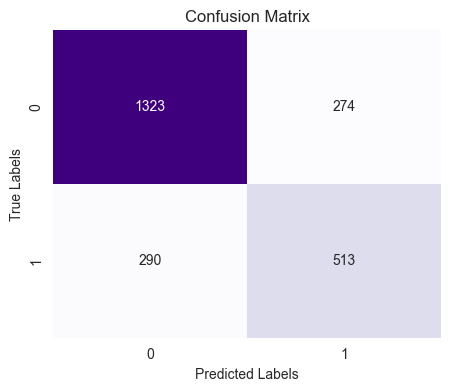

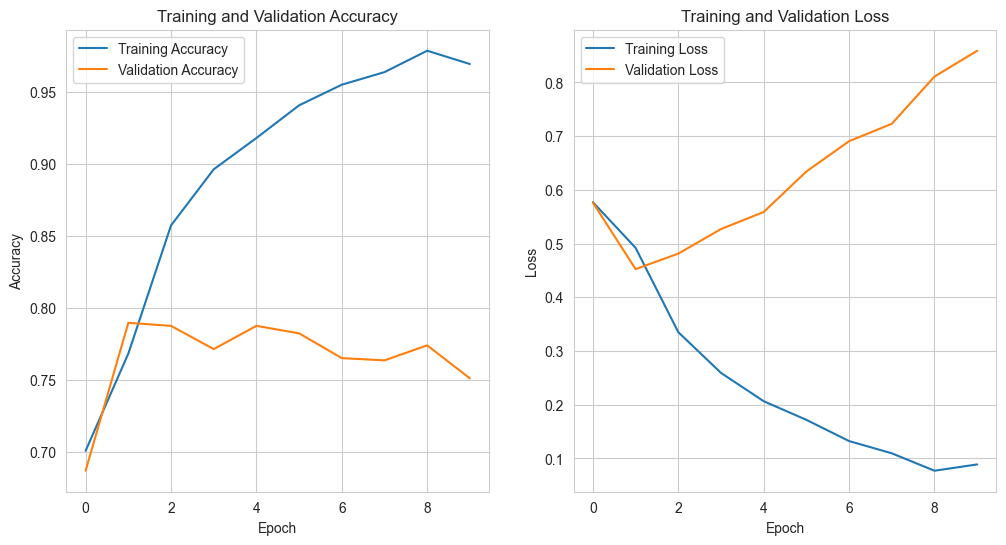

In [66]:
# Making predictions on the test data

predicted_probabilities = model_rnn.predict(X_test)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Classification Report

print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# Confusion Matrix

conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plotting metrics

plot_history(history)

### Hyperparameter tuning 

In [67]:
model_rnn_hp = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=200),
    tf.keras.layers.SimpleRNN(100),  
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

# Compiling the model

model_rnn_hp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing the model summary

print(model_rnn_hp.summary())

history = model_rnn_hp.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 128)          5541120   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               22900     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5564121 (21.23 MB)
Trainable params: 5564121 (21.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
120/120 [==============================] - 7s 50ms/step - loss: 0.6168 - accuracy: 0.6714 - val_loss: 0.5852 - val_accuracy: 0.6948
Epoch 2/10
120/120 [==============================] - 6s 52ms/step - loss: 0.3760 - accuracy: 0.8333 - val_loss: 0.5180 - val_accu

75/75 [==============================] - 1s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1597
           1       0.72      0.65      0.68       803

    accuracy                           0.80      2400
   macro avg       0.78      0.76      0.77      2400
weighted avg       0.80      0.80      0.80      2400



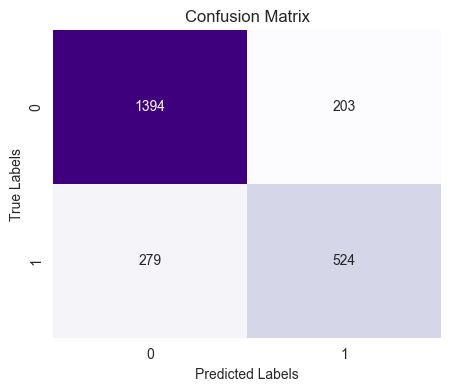

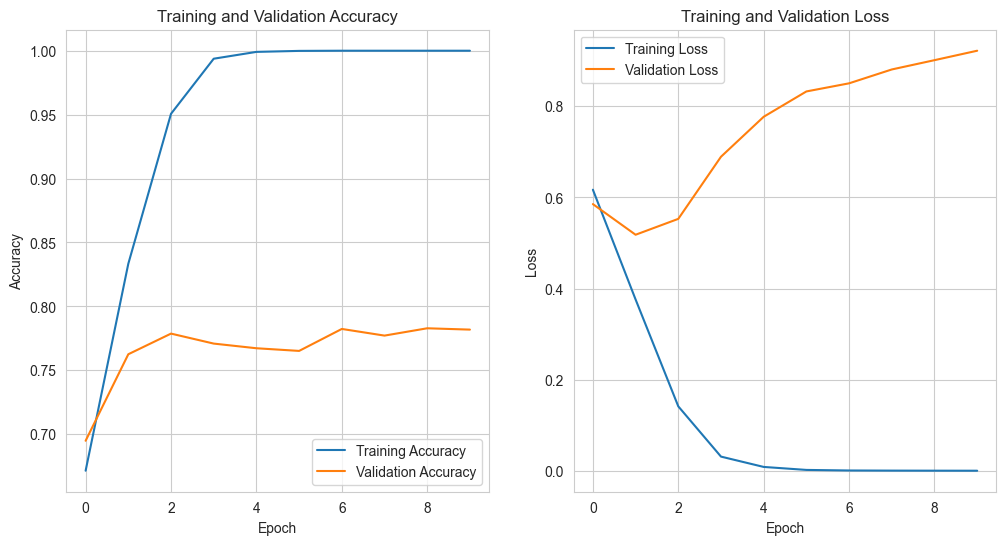

In [68]:
# Making predictions on the test data

predicted_probabilities = model_rnn_hp.predict(X_test)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plotting metrics

plot_history(history)

### Regularization 

In [69]:
# Adding Spatial dropout and setting dropout and recurrent dropout 

model_rnn_reg = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=200),
    tf.keras.layers.SpatialDropout1D(0.2), 
    tf.keras.layers.SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2),  
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
# Compiling the model

model_rnn_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing the model summary

print(model_rnn_reg.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 128)          5541120   
                                                                 
 spatial_dropout1d_3 (Spati  (None, 200, 128)          0         
 alDropout1D)                                                    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100)               22900     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5564121 (21.23 MB)
Trainable params: 5564121 (21.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [70]:
history = model_rnn_reg.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
240/240 [==============================] - 11s 43ms/step - loss: 0.6572 - accuracy: 0.6318 - val_loss: 0.6439 - val_accuracy: 0.6583
Epoch 2/10
240/240 [==============================] - 10s 43ms/step - loss: 0.5751 - accuracy: 0.7046 - val_loss: 0.5433 - val_accuracy: 0.7328
Epoch 3/10
240/240 [==============================] - 10s 43ms/step - loss: 0.4303 - accuracy: 0.8065 - val_loss: 0.5438 - val_accuracy: 0.7693
Epoch 4/10
240/240 [==============================] - 10s 43ms/step - loss: 0.4244 - accuracy: 0.8085 - val_loss: 0.5296 - val_accuracy: 0.7344
Epoch 5/10
240/240 [==============================] - 10s 43ms/step - loss: 0.3827 - accuracy: 0.8306 - val_loss: 0.7780 - val_accuracy: 0.6677
Epoch 6/10
240/240 [==============================] - 10s 44ms/step - loss: 0.4428 - accuracy: 0.8012 - val_loss: 0.6753 - val_accuracy: 0.6885
Epoch 7/10
240/240 [==============================] - 10s 43ms/step - loss: 0.5012 - accuracy: 0.7587 - val_loss: 0.5824 - val_accuracy:

75/75 [==============================] - 1s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1597
           1       0.61      0.49      0.54       803

    accuracy                           0.72      2400
   macro avg       0.69      0.67      0.67      2400
weighted avg       0.71      0.72      0.72      2400



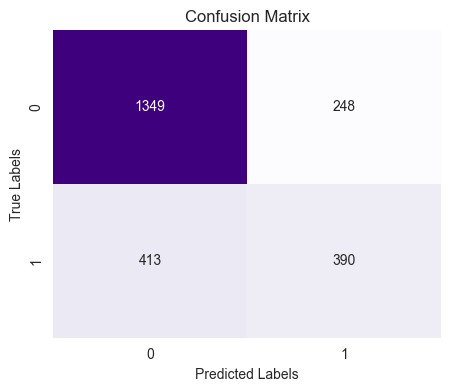

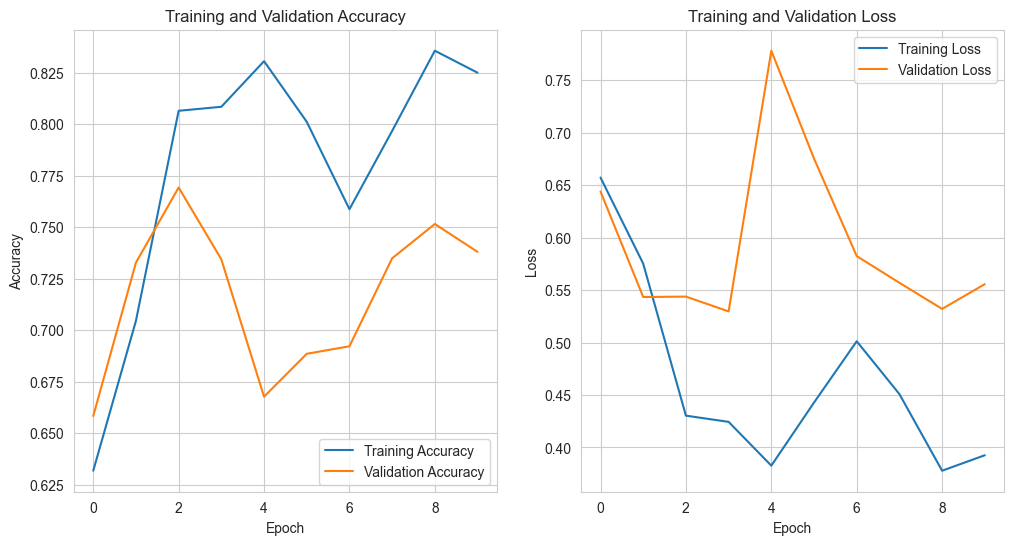

In [71]:
# Making predictions on the test data

predicted_probabilities = model_rnn_reg.predict(X_test)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Classification Report

print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# Confusion Matrix

conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plotting metrics

plot_history(history)

#### Testing the models prediction ability with random texts

In [72]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_sentiment(text, model, tokenizer, max_length=200):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw, maxlen=max_length)
    prediction = int(model.predict(tw).round().item())
    return sentiment_label[1][prediction]

In [73]:
test_sentence1 = "I did not enjoy this book."
prediction = predict_sentiment(test_sentence1, model_lstm, tokenizer)
print("Positive Statement" if prediction == 1 else "Negative Statement")

1/1 [==============================] - 0s 222ms/step
Negative Statement


In [74]:
test_sentence2 = "I thoroughly enjoyed this book."
prediction = predict_sentiment(test_sentence2, model_rnn, tokenizer)
print("Positive Statement" if prediction == 1 else "Negative Statement")

1/1 [==============================] - 0s 80ms/step
Positive Statement


In [75]:
test_sentence3 = "I would not recommend this book to anyone."
prediction = predict_sentiment(test_sentence3, model_lstm_reg, tokenizer)
print("Positive Statement" if prediction == 1 else "Negative Statement")

1/1 [==============================] - 0s 144ms/step
Negative Statement


#### Determining to recommend or not to recommend using predicted sentiment

In [76]:
import os

def predict_sentiment_with_recommendation(text, model):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw, maxlen=200)
    
# Redirecting stdout to os.devnull to suppress output
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull  # Redirect stdout
        prediction = int(model.predict(tw).round().item())
        sys.stdout = old_stdout  # Restore stdout
    
    sentiment = sentiment_label[1][prediction]
    recommendation = "Recommend" if prediction == 0 else "Do not recommend"
    return sentiment, recommendation

# Adding a new column for recommendation to the dataframe

df['recommendation'] = ''

# Looping through each review in the DataFrame and making recommendations

for index, row in df.iterrows():
    sentiment, recommendation = predict_sentiment_with_recommendation(row['reviewText'], model_lstm)  # Use any model here
    df.at[index, 'recommendation'] = recommendation

print(df[['reviewText', 'recommendation']])

                                              reviewText    recommendation
0      jace rankin may be short but he's nothing to m...         Recommend
1      great short read i didn't want to put it down ...         Recommend
2      i'll start by saying this is the first of four...         Recommend
3      aggie is angela lansbury who carries pocketboo...         Recommend
4      i did not expect this type of book to be in li...  Do not recommend
...                                                  ...               ...
11995  valentine cupid is a vampire- jena and ian ano...         Recommend
11996  i have read all seven books in this series apo...         Recommend
11997  this book really just wasn't my cuppa the situ...  Do not recommend
11998  tried to use it to charge my kindle it didn't ...  Do not recommend
11999  taking instruction is a look into the often hi...         Recommend

[12000 rows x 2 columns]


In [77]:
# Example sentences

test_sentences = [
    "I loved this book, highly recommend it!",
    "This book was terrible, don't waste your time.",
    "An average read, nothing special.",
    "One of the best books I've ever read.",
    "Couldn't put it down, definitely recommend it!"
]

In [78]:
# Looping through the test sentences and making recommendations using the RNN model

for sentence in test_sentences:
    sentiment, recommendation = predict_sentiment_with_recommendation(sentence, model_rnn)  
    print("Sentence:", sentence)
    print("Sentiment:", sentiment)
    print("Recommendation:", recommendation)
    print()

Sentence: I loved this book, highly recommend it!
Sentiment: 1
Recommendation: Recommend

Sentence: This book was terrible, don't waste your time.
Sentiment: 0
Recommendation: Do not recommend

Sentence: An average read, nothing special.
Sentiment: 1
Recommendation: Recommend

Sentence: One of the best books I've ever read.
Sentiment: 1
Recommendation: Recommend

Sentence: Couldn't put it down, definitely recommend it!
Sentiment: 1
Recommendation: Recommend



In [79]:
# Looping through the test sentences and making recommendations using the LSTM model

for sentence in test_sentences:
    sentiment, recommendation = predict_sentiment_with_recommendation(sentence, model_lstm)  
    print("Sentence:", sentence)
    print("Sentiment:", sentiment)
    print("Recommendation:", recommendation)
    print()

Sentence: I loved this book, highly recommend it!
Sentiment: 1
Recommendation: Recommend

Sentence: This book was terrible, don't waste your time.
Sentiment: 0
Recommendation: Do not recommend

Sentence: An average read, nothing special.
Sentiment: 1
Recommendation: Recommend

Sentence: One of the best books I've ever read.
Sentiment: 1
Recommendation: Recommend

Sentence: Couldn't put it down, definitely recommend it!
Sentiment: 1
Recommendation: Recommend

